# Image Display Notebook

This notebook displays images from the Original Images folder.

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import os

# Set up the path to the images
images_path = "Original Images"

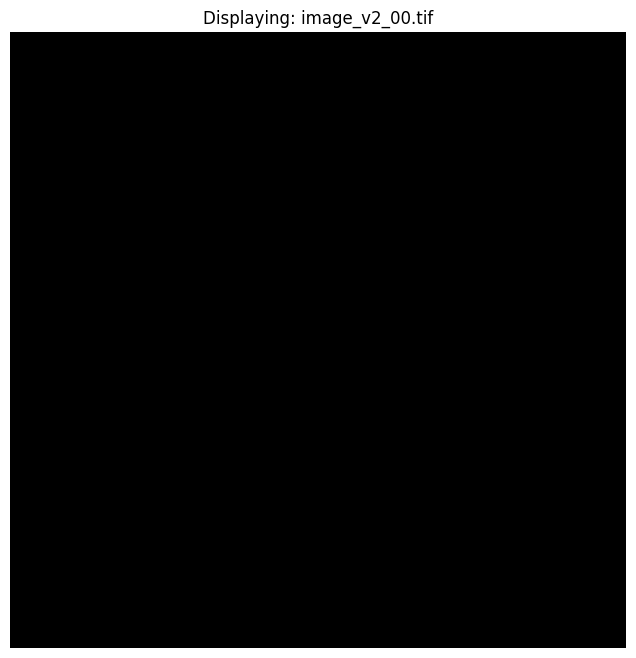

Image shape: (768, 768)
Image mode: F
Image size: (768, 768)


In [3]:
# Display the first image
image_filename = "image_v2_00.tif"
image_path = os.path.join(images_path, image_filename)

# Load and display the image
img = Image.open(image_path)
plt.figure(figsize=(10, 8))
plt.imshow(img, cmap='gray' if len(np.array(img).shape) == 2 else None)
plt.title(f'Displaying: {image_filename}')
plt.axis('off')
plt.show()

print(f"Image shape: {np.array(img).shape}")
print(f"Image mode: {img.mode}")
print(f"Image size: {img.size}")

## Using ImageJ for Image Visualization

ImageJ is a powerful image analysis software that can be used through Python via the `pyimagej` library.

In [ ]:
# Install and import ImageJ dependencies
# Note: This might take a while on first run as it downloads ImageJ/Fiji
try:
    import imagej
    print("ImageJ already installed")
except ImportError:
    print("Installing ImageJ dependencies...")
    import subprocess
    import sys
    
    # Install required packages
    packages = ['pyimagej', 'scyjava', 'imageio']
    for package in packages:
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])
    
    import imagej
    print("ImageJ installation completed")

In [ ]:
# Initialize ImageJ
print("Initializing ImageJ...")
ij = imagej.init()
print(f"ImageJ version: {ij.getVersion()}")

# Load the same image into ImageJ
import numpy as np
from PIL import Image

# Convert PIL image to numpy array that ImageJ can work with
img_array = np.array(img)
print(f"Image array shape: {img_array.shape}")
print(f"Image array dtype: {img_array.dtype}")

In [ ]:
# Use ImageJ to process and display the image
# Convert numpy array to ImageJ format
ij_image = ij.py.to_imageplus(img_array)

# Display basic image information using ImageJ
print("=== ImageJ Image Analysis ===")
print(f"Image Title: {ij_image.getTitle()}")
print(f"Image Width: {ij_image.getWidth()}")
print(f"Image Height: {ij_image.getHeight()}")
print(f"Image Type: {ij_image.getType()}")
print(f"Pixel Size: {ij_image.getCalibration().pixelWidth} x {ij_image.getCalibration().pixelHeight}")

# Get image statistics using ImageJ
stats = ij.op().stats()
if img_array.ndim == 2:  # Grayscale image
    mean_val = float(ij.op().stats().mean(ij.py.to_dataset(img_array)))
    min_val = float(ij.op().stats().min(ij.py.to_dataset(img_array)))
    max_val = float(ij.op().stats().max(ij.py.to_dataset(img_array)))
    
    print(f"\n=== Image Statistics ===")
    print(f"Mean intensity: {mean_val:.2f}")
    print(f"Min intensity: {min_val:.2f}")
    print(f"Max intensity: {max_val:.2f}")

# Convert back to numpy for matplotlib display with ImageJ processing
processed_array = ij.py.from_java(ij_image)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_array, cmap='gray' if img_array.ndim == 2 else None)
plt.title('Original Image (PIL)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(processed_array, cmap='gray' if processed_array.ndim == 2 else None)
plt.title('Processed with ImageJ')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Example ImageJ operations - Apply some filters and enhancements
print("=== Applying ImageJ Filters ===")

# Convert to ImageJ dataset for processing
dataset = ij.py.to_dataset(img_array)

# Apply Gaussian blur
sigma = 1.0
blurred = ij.op().filter().gauss(dataset, sigma)
blurred_array = ij.py.from_java(blurred)

# Apply edge detection (Sobel filter)
edges = ij.op().filter().sobel(dataset)
edges_array = ij.py.from_java(edges)

# Display results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_array, cmap='gray' if img_array.ndim == 2 else None)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(blurred_array, cmap='gray' if blurred_array.ndim == 2 else None)
plt.title(f'Gaussian Blur (σ={sigma})')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edges_array, cmap='gray')
plt.title('Edge Detection (Sobel)')
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Original shape: {img_array.shape}")
print(f"Blurred shape: {blurred_array.shape}")
print(f"Edges shape: {edges_array.shape}")

In [1]:
# Alternative: ImageJ-style visualization using existing libraries
# This provides similar functionality to ImageJ without requiring Java installation

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from scipy import ndimage
from skimage import filters, feature, measure
import os

# Re-load the image since kernel was restarted
images_path = "Original Images"
image_filename = "image_v2_00.tif"
image_path = os.path.join(images_path, image_filename)
img = Image.open(image_path)
img_array = np.array(img)

print(f"Image loaded: {image_filename}")
print(f"Shape: {img_array.shape}, dtype: {img_array.dtype}")
print(f"Min: {img_array.min()}, Max: {img_array.max()}, Mean: {img_array.mean():.2f}")

Image loaded: image_v2_00.tif
Shape: (768, 768), dtype: float32
Min: -3.5173934520571493e-06, Max: 0.00043277101940475404, Mean: 0.00


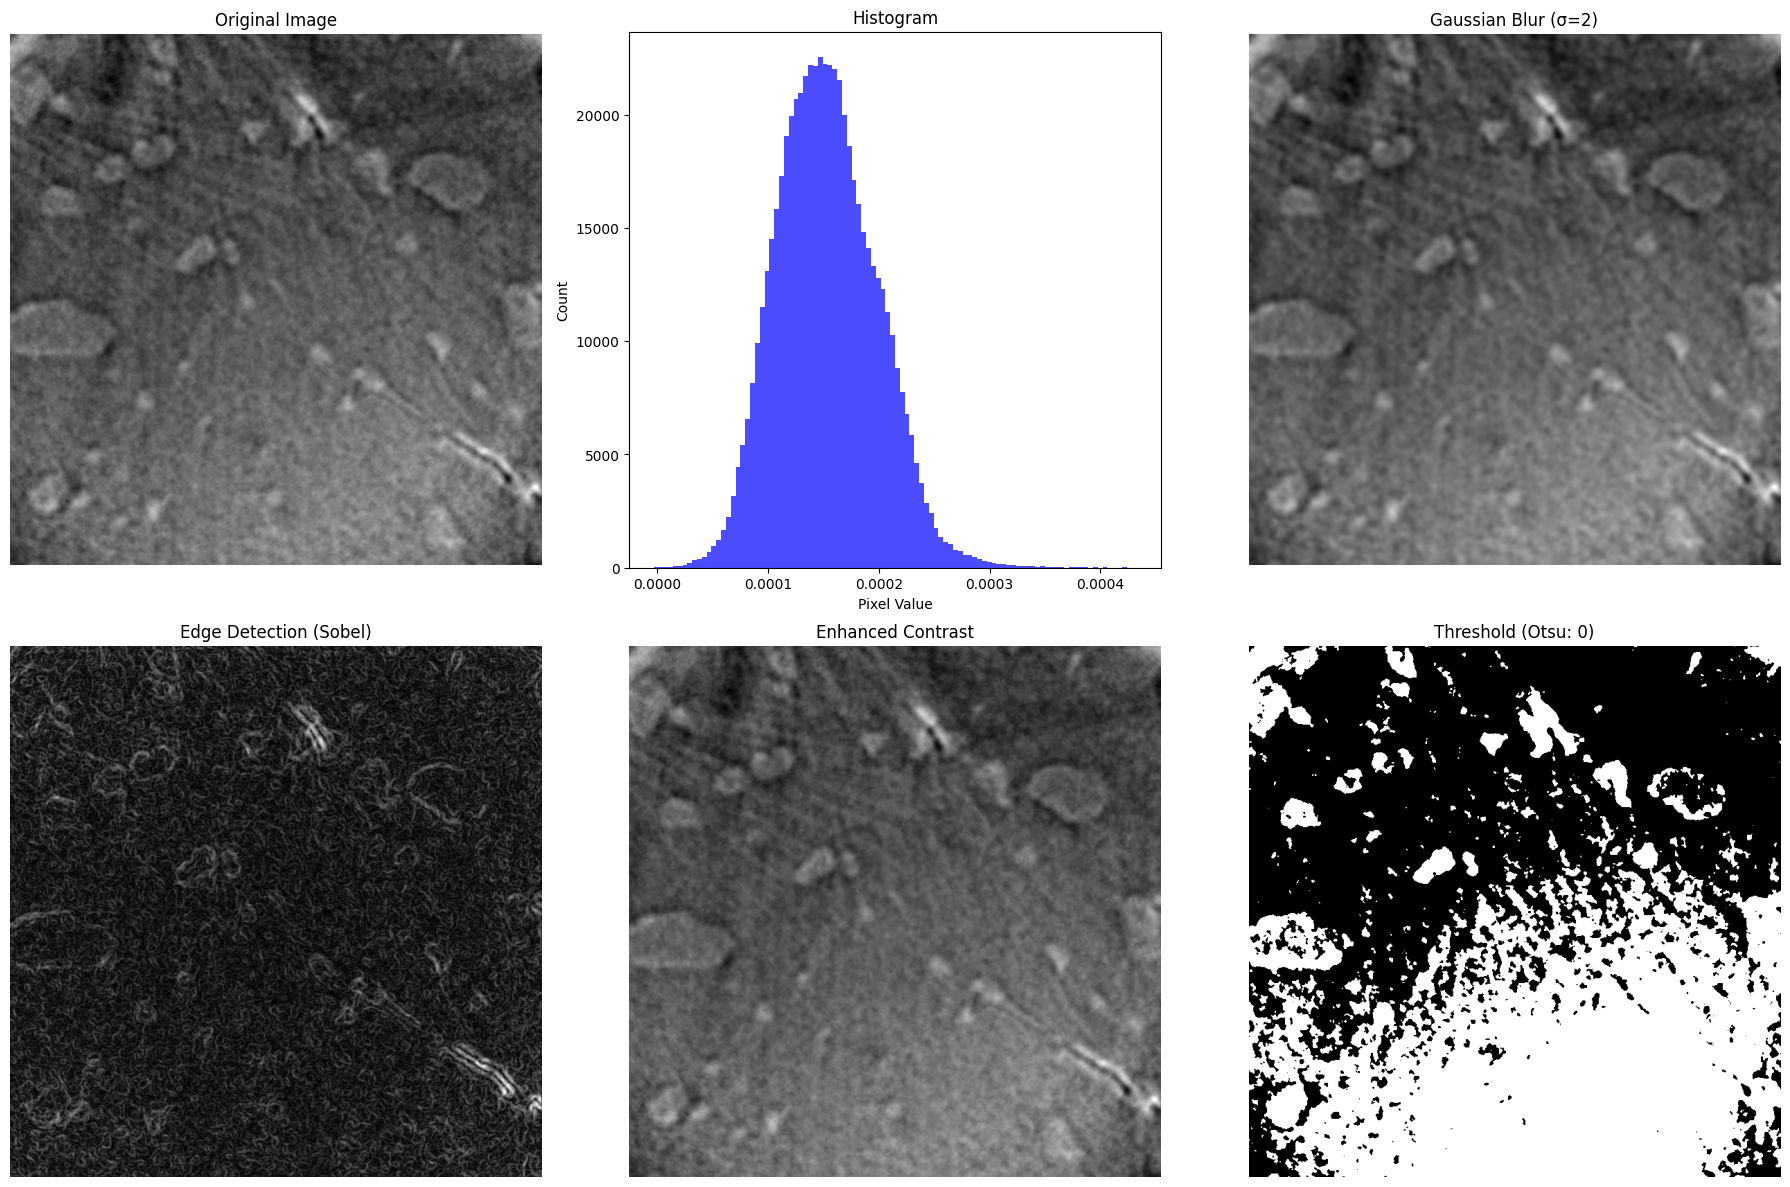

Threshold value (Otsu): 0.00
Number of foreground pixels: 268178
Number of background pixels: 321646


In [2]:
# ImageJ-style image processing and visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Original image
axes[0, 0].imshow(img_array, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Histogram (like ImageJ's Analyze > Histogram)
axes[0, 1].hist(img_array.flatten(), bins=100, alpha=0.7, color='blue')
axes[0, 1].set_title('Histogram')
axes[0, 1].set_xlabel('Pixel Value')
axes[0, 1].set_ylabel('Count')

# Gaussian blur (like ImageJ's Process > Filters > Gaussian Blur)
blurred = ndimage.gaussian_filter(img_array.astype(float), sigma=2)
axes[0, 2].imshow(blurred, cmap='gray')
axes[0, 2].set_title('Gaussian Blur (σ=2)')
axes[0, 2].axis('off')

# Edge detection (like ImageJ's Process > Find Edges)
edges = filters.sobel(img_array.astype(float))
axes[1, 0].imshow(edges, cmap='gray')
axes[1, 0].set_title('Edge Detection (Sobel)')
axes[1, 0].axis('off')

# Enhance contrast (like ImageJ's Process > Enhance Contrast)
# Normalize to 0-255 range
normalized = ((img_array - img_array.min()) / (img_array.max() - img_array.min()) * 255).astype(np.uint8)
axes[1, 1].imshow(normalized, cmap='gray')
axes[1, 1].set_title('Enhanced Contrast')
axes[1, 1].axis('off')

# Threshold (like ImageJ's Image > Adjust > Threshold)
threshold_val = filters.threshold_otsu(img_array)
binary = img_array > threshold_val
axes[1, 2].imshow(binary, cmap='gray')
axes[1, 2].set_title(f'Threshold (Otsu: {threshold_val:.0f})')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print(f"Threshold value (Otsu): {threshold_val:.2f}")
print(f"Number of foreground pixels: {np.sum(binary)}")
print(f"Number of background pixels: {np.sum(~binary)}")

## Installing Full ImageJ (Optional)

If you want to use the full ImageJ software with Python integration, you need to:

1. **Install Java**: ImageJ requires Java to run
2. **Install Fiji/ImageJ**: Download from https://fiji.sc/
3. **Use PyImageJ**: The Python wrapper we attempted above

### macOS Java Installation:
```bash
# Install Java using Homebrew
brew install openjdk@11

# Or download from Oracle: https://www.oracle.com/java/technologies/downloads/
```

### Alternative Approach - Launch ImageJ Separately:
You can also save your images and open them in the standalone ImageJ/Fiji application for advanced analysis.

In [3]:
# Save processed images for external ImageJ analysis
import os

# Create output directory
output_dir = "ImageJ_outputs"
os.makedirs(output_dir, exist_ok=True)

# Save the enhanced contrast version
enhanced_img = Image.fromarray(normalized)
enhanced_path = os.path.join(output_dir, f"enhanced_{image_filename}")
enhanced_img.save(enhanced_path)

# Save the edge detection result
edges_normalized = ((edges - edges.min()) / (edges.max() - edges.min()) * 255).astype(np.uint8)
edges_img = Image.fromarray(edges_normalized)
edges_path = os.path.join(output_dir, f"edges_{image_filename}")
edges_img.save(edges_path)

# Save the thresholded binary image
binary_img = Image.fromarray((binary * 255).astype(np.uint8))
binary_path = os.path.join(output_dir, f"binary_{image_filename}")
binary_img.save(binary_path)

print("Images saved for external ImageJ analysis:")
print(f"- Enhanced contrast: {enhanced_path}")
print(f"- Edge detection: {edges_path}")
print(f"- Binary threshold: {binary_path}")
print("\nYou can now open these files in ImageJ/Fiji for further analysis!")

Images saved for external ImageJ analysis:
- Enhanced contrast: ImageJ_outputs/enhanced_image_v2_00.tif
- Edge detection: ImageJ_outputs/edges_image_v2_00.tif
- Binary threshold: ImageJ_outputs/binary_image_v2_00.tif

You can now open these files in ImageJ/Fiji for further analysis!
